In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ekstrak
import zipfile, os
import shutil

local_zip = '/content/drive/MyDrive/Dataset/challenges-in-representation-learning-facial-expression-recognition-challenge.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
data = pd.read_csv("/content/icml_face_data.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1    Usage   35887 non-null  object
 2    pixels  35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [ ]:
def string_to_image(pixels_string):
    pixels = np.array(pixels_string.split(), dtype='float32')
    image = pixels.reshape(48, 48)  # Assuming each image is 48x48
    image = image / 255.0  # Normalize pixel values to 0-1
    return image

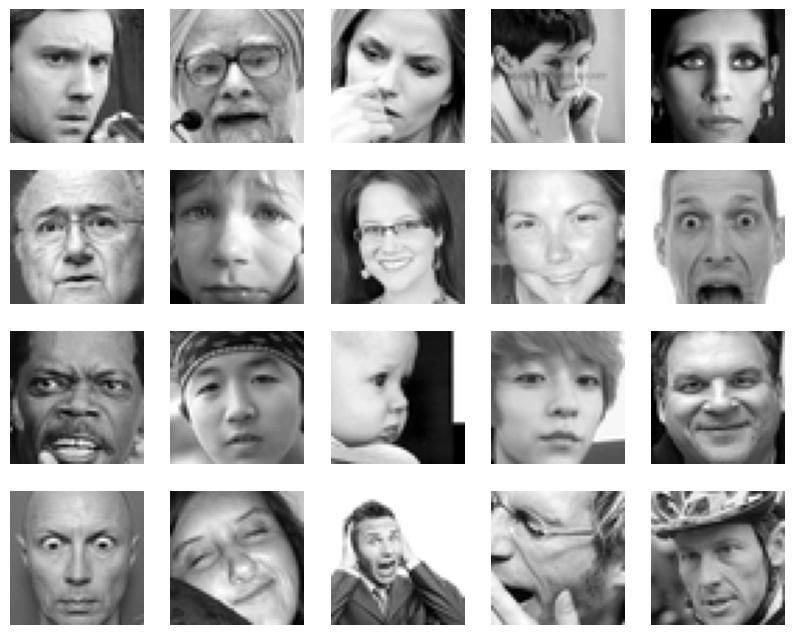

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(20):
    pixels_string = data.iloc[i][' pixels']
    image = string_to_image(pixels_string)
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()

### Face Detection RetinaFace

In [ ]:
!pip install retina-face

In [ ]:
data = data[:20]

In [ ]:
from retinaface import RetinaFace
from PIL import Image
import cv2

def detect_face(pixels):
    # Convert pixel string to list of integers
    pixels = [int(pixel) for pixel in pixels.split()]
    # Calculate image dimensions (assuming images are square)
    side_length = int(len(pixels) ** 0.5)
    # Convert pixel list to a numpy array and reshape to image dimensions
    image_array = np.array(pixels, dtype=np.uint8).reshape((side_length, side_length))
    # Convert to PIL Image and then to RGB
    image = Image.fromarray(image_array).convert("RGB")
    # Run face detection using RetinaFace
    faces = RetinaFace.detect_faces(np.array(image))
    print(f'Detections: {faces}')
    # Return 1 if a face is detected, otherwise 0
    return 1 if faces else 0

In [ ]:
result = data[' pixels'].apply(detect_face)

24-11-11 05:47:29 - Directory /root/.deepface created
24-11-11 05:47:29 - Directory /root/.deepface/weights created
24-11-11 05:47:29 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:01<00:00, 111MB/s]


Detections: {}
Detections: {}
Detections: {'face_1': {'score': 0.9270192980766296, 'facial_area': [10, 9, 37, 47], 'landmarks': {'right_eye': [15.423172, 20.538286], 'left_eye': [27.986126, 20.952742], 'nose': [19.157862, 28.861284], 'mouth_right': [16.536083, 37.19118], 'mouth_left': [25.500053, 37.54621]}}}
Detections: {}
Detections: {}
Detections: {}
Detections: {'face_1': {'score': 0.9026193618774414, 'facial_area': [12, 21, 32, 47], 'landmarks': {'right_eye': [16.626005, 34.235767], 'left_eye': [25.090467, 33.107025], 'nose': [20.920725, 38.87207], 'mouth_right': [19.314835, 42.943233], 'mouth_left': [25.560059, 42.023323]}}}
Detections: {'face_1': {'score': 0.9938134551048279, 'facial_area': [11, 9, 35, 42], 'landmarks': {'right_eye': [15.872218, 21.5638], 'left_eye': [27.108496, 20.283113], 'nose': [21.031116, 26.725319], 'mouth_right': [17.767204, 33.15415], 'mouth_left': [28.303373, 32.085968]}}}
Detections: {}
Detections: {}
Detections: {}
Detections: {}
Detections: {'face_1'

### Face Detection MTCNN

In [ ]:
!pip install facenet-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 822.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16

In [ ]:
from facenet_pytorch import MTCNN
import torch
from PIL import Image
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import cv2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(
    image_size=48, margin=0, min_face_size=10,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device
)

In [ ]:
tes = data[:20]

In [ ]:
def pixels_to_image(pixels_str):
    pixels = np.fromstring(pixels_str, sep=' ').astype(np.uint8)
    img = pixels.reshape(48, 48)  # Assuming image size is 48x48
    return Image.fromarray(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

In [ ]:
# Detect faces in dataset
def detect_faces(df):
    face_detected = []

    for i, row in df.iterrows():
        img = pixels_to_image(row[' pixels'])  # Convert pixels to image
        x_aligned, prob = mtcnn(img, return_prob=True)
        print(f'Image: {i+1}, Prob: {prob}')
        if x_aligned is not None:
            face_detected.append(1)  # Face detected
        else:
            face_detected.append(0)  # No face detected

    return face_detected

In [ ]:
result = detect_faces(tes)

Image: 1, Prob: 0.9999854564666748
Image: 2, Prob: 0.9991018772125244
Image: 3, Prob: 0.9987004995346069
Image: 4, Prob: None
Image: 5, Prob: 0.998219907283783
Image: 6, Prob: 0.9983862638473511
Image: 7, Prob: 0.9991133809089661
Image: 8, Prob: 0.999406099319458
Image: 9, Prob: 0.9986143112182617
Image: 10, Prob: 0.9998181462287903
Image: 11, Prob: 0.9976167678833008
Image: 12, Prob: 0.999683141708374
Image: 13, Prob: 0.9799646139144897
Image: 14, Prob: 0.9990330934524536
Image: 15, Prob: 0.9999295473098755
Image: 16, Prob: 0.9984642267227173
Image: 17, Prob: 0.9942722320556641
Image: 18, Prob: 0.9978335499763489
Image: 19, Prob: None
Image: 20, Prob: 0.9990942478179932


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical
from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
# ekstrak
import zipfile, os
import shutil

local_zip = '/content/drive/MyDrive/Dataset/challenges-in-representation-learning-facial-expression-recognition-challenge.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
data = pd.read_csv("/content/icml_face_data.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1    Usage   35887 non-null  object
 2    pixels  35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [ ]:
data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
data[' pixels'][0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

# Preprocessing
- cek null
- cek dan hapus duplikat
- normalisasi data

### cek null

In [ ]:
data.isnull().sum()

,0
emotion,0
Usage,0
pixels,0


In [ ]:
data.shape

(35887, 3)

### cek duplikat

In [ ]:
duplicate_count = data.duplicated(subset=' pixels').sum()

print(f"Number of duplicate rows': {duplicate_count}")

Number of duplicate rows': 1853


In [ ]:
data[data.duplicated(subset=' pixels')]

,emotion,Usage,pixels
675,5,Training,255 255 255 255 255 255 255 237 217 146 185 11...
718,2,Training,114 95 82 84 85 120 108 97 83 64 68 85 80 86 1...
1145,5,Training,205 204 205 205 204 203 203 203 202 202 203 20...
1266,3,Training,201 218 246 178 74 62 63 78 85 83 71 65 64 67 ...
1289,5,Training,238 69 24 32 34 33 27 30 41 49 60 64 47 65 80 ...
...,...,...,...
35826,2,PrivateTest,200 201 199 197 198 199 199 198 197 196 194 19...
35833,5,PrivateTest,254 254 254 254 254 253 252 254 113 36 62 69 6...
35874,5,PrivateTest,43 43 51 73 94 97 102 95 99 107 126 144 154 17...
35875,5,PrivateTest,248 251 239 144 102 95 82 77 91 138 153 145 14...


In [ ]:
data[' pixels'][1289]

'238 69 24 32 34 33 27 30 41 49 60 64 47 65 80 84 94 86 86 92 91 89 103 130 164 196 198 196 201 199 188 175 159 137 113 92 61 40 36 45 52 44 27 82 247 253 251 252 226 53 29 33 30 27 28 37 44 50 58 39 57 70 66 71 79 97 109 105 112 125 144 162 194 203 202 200 199 198 194 187 179 164 143 121 96 60 36 33 35 53 46 45 220 255 250 252 194 35 31 32 29 26 31 40 43 61 45 55 44 39 48 62 83 104 127 145 158 166 170 192 208 208 206 205 203 201 199 195 185 180 167 146 124 105 81 61 47 47 60 40 191 255 249 251 177 28 35 35 31 31 37 34 60 54 51 38 46 71 96 125 150 156 164 169 175 183 198 206 209 211 209 208 203 199 198 196 189 185 178 167 157 148 144 125 79 50 62 43 180 255 248 251 180 32 41 38 32 38 33 50 59 43 41 74 120 151 171 183 185 189 195 195 191 194 201 200 200 197 199 202 203 204 202 199 195 192 180 171 171 167 158 144 116 61 58 53 177 255 249 251 169 37 43 34 34 36 42 56 42 62 120 160 176 182 188 198 204 206 209 207 206 203 203 201 202 203 206 208 205 202 198 197 190 187 179 172 172 171 160 1

In [ ]:
data[data[" pixels"] == "238 69 24 32 34 33 27 30 41 49 60 64 47 65 80 84 94 86 86 92 91 89 103 130 164 196 198 196 201 199 188 175 159 137 113 92 61 40 36 45 52 44 27 82 247 253 251 252 226 53 29 33 30 27 28 37 44 50 58 39 57 70 66 71 79 97 109 105 112 125 144 162 194 203 202 200 199 198 194 187 179 164 143 121 96 60 36 33 35 53 46 45 220 255 250 252 194 35 31 32 29 26 31 40 43 61 45 55 44 39 48 62 83 104 127 145 158 166 170 192 208 208 206 205 203 201 199 195 185 180 167 146 124 105 81 61 47 47 60 40 191 255 249 251 177 28 35 35 31 31 37 34 60 54 51 38 46 71 96 125 150 156 164 169 175 183 198 206 209 211 209 208 203 199 198 196 189 185 178 167 157 148 144 125 79 50 62 43 180 255 248 251 180 32 41 38 32 38 33 50 59 43 41 74 120 151 171 183 185 189 195 195 191 194 201 200 200 197 199 202 203 204 202 199 195 192 180 171 171 167 158 144 116 61 58 53 177 255 249 251 169 37 43 34 34 36 42 56 42 62 120 160 176 182 188 198 204 206 209 207 206 203 203 201 202 203 206 208 205 202 198 197 190 187 179 172 172 171 160 146 121 71 51 53 174 255 248 251 171 42 37 33 36 39 48 51 101 160 170 175 180 185 192 199 200 199 203 203 200 201 200 199 199 196 196 198 199 198 198 197 193 187 179 176 177 173 164 151 123 73 49 52 182 255 249 252 186 42 37 40 40 47 50 122 180 180 185 188 190 195 200 203 205 205 204 204 200 199 198 197 198 200 203 204 205 203 200 198 191 185 182 179 180 173 161 150 124 76 49 57 192 255 249 252 200 43 43 45 47 49 99 171 178 188 188 184 181 189 199 202 204 206 203 202 204 203 202 202 201 204 205 208 206 204 202 199 193 192 188 184 180 173 162 149 124 75 53 58 181 255 249 252 214 56 47 47 41 51 129 162 175 183 187 192 194 194 197 203 210 214 210 206 204 203 202 202 201 204 206 211 212 212 208 205 200 195 194 184 179 173 161 145 128 80 53 59 172 254 249 252 229 74 43 39 30 63 129 158 146 109 113 123 158 187 199 201 209 211 212 210 210 210 205 206 206 208 211 213 215 210 204 194 176 162 157 139 136 157 160 142 130 86 54 60 162 255 250 252 239 93 32 23 33 76 136 138 110 133 139 108 95 113 144 173 198 206 209 210 211 208 205 206 207 210 213 211 206 185 153 127 114 119 137 140 122 114 136 140 135 100 54 64 110 225 251 251 255 109 26 32 47 108 137 118 141 196 209 209 177 133 125 126 150 191 203 206 206 206 207 209 207 209 209 203 181 148 117 129 139 179 202 203 192 167 138 138 142 125 71 59 106 157 207 254 206 115 46 35 78 139 129 140 180 192 202 210 218 207 189 176 159 175 185 201 205 206 206 206 208 207 201 182 172 167 175 189 200 211 206 202 195 190 175 146 149 145 89 69 155 169 172 250 159 135 46 33 103 143 134 153 181 188 192 196 200 204 201 194 191 190 188 197 202 206 207 206 206 206 198 185 190 190 187 174 162 161 163 173 180 179 171 159 153 153 99 89 163 137 171 254 122 142 60 36 104 146 139 152 175 164 149 128 116 108 111 125 149 174 183 192 198 202 206 205 206 204 194 182 175 152 99 60 51 51 55 79 113 151 159 158 156 159 114 106 159 147 197 255 94 123 69 44 109 148 142 152 159 132 95 66 60 57 59 63 71 119 154 164 181 193 200 203 204 196 175 156 139 92 51 56 57 66 59 33 47 110 147 155 158 164 142 139 177 165 205 255 130 142 101 68 121 151 146 153 153 130 76 51 82 125 100 92 90 77 115 141 156 178 195 202 199 185 156 136 110 81 116 121 117 114 146 97 48 101 145 160 163 164 163 165 183 173 213 255 138 155 139 99 132 153 154 160 158 133 70 96 197 162 135 137 160 130 89 131 148 168 192 204 198 179 150 139 116 139 191 110 55 97 159 194 112 114 156 167 170 167 168 157 176 177 219 255 140 154 121 110 142 154 160 168 163 138 115 179 203 127 66 73 161 214 129 142 160 165 190 211 202 179 158 163 145 170 202 137 116 127 177 178 133 149 175 181 174 168 171 166 168 178 230 255 153 143 125 118 144 157 164 173 175 169 143 173 202 160 140 151 190 197 172 177 177 174 194 217 213 185 170 170 183 170 171 167 156 156 156 139 141 173 187 189 174 166 172 179 165 184 242 254 178 144 151 152 145 154 164 176 187 193 160 135 162 176 176 180 185 160 171 181 182 183 203 220 216 190 176 175 184 181 170 165 162 159 155 154 169 188 195 188 175 164 172 179 168 195 251 252 191 149 174 175 149 151 160 177 191 199 188 158 143 142 154 155 155 164 184 191 188 186 206 219 214 193 177 187 189 198 191 180 177 177 175 182 194 202 199 187 173 161 172 181 164 209 255 251 219 163 168 168 151 149 157 173 186 199 202 191 177 169 167 170 176 191 200 199 184 185 206 216 212 189 175 184 194 198 201 204 204 205 208 207 206 205 194 178 167 157 174 189 172 240 253 251 248 167 150 177 165 145 153 169 182 196 205 207 203 198 196 198 200 205 206 196 175 184 209 214 212 186 168 179 195 203 206 211 213 215 217 214 207 197 181 170 160 156 174 173 207 255 250 252 255 214 145 146 158 149 146 160 175 188 200 211 212 209 208 211 211 209 205 192 170 181 207 214 212 182 163 174 191 205 210 217 216 215 215 212 198 184 170 160 154 156 178 178 237 254 251 252 251 252 186 137 152 151 143 154 165 177 187 203 212 216 214 213 212 209 202 185 167 180 207 216 206 178 159 165 182 201 207 217 215 212 208 200 187 171 156 151 151 155 174 208 254 250 251 252 251 252 248 181 132 148 144 149 157 168 176 187 197 205 206 208 209 208 196 177 164 178 206 217 202 176 162 158 171 195 206 210 207 205 198 185 172 158 144 138 144 148 198 250 251 250 251 252 252 250 253 250 207 170 142 144 145 161 173 182 187 195 200 201 202 200 189 173 165 173 207 221 204 176 171 173 163 185 197 199 194 186 178 162 166 184 193 170 134 146 222 255 250 251 251 251 252 251 251 251 255 225 141 139 139 153 167 176 181 187 197 196 194 195 179 172 173 167 202 227 213 179 177 186 163 167 187 190 180 170 162 185 212 214 227 211 154 161 230 255 250 252 252 252 251 252 252 251 252 245 152 133 137 141 155 169 179 182 186 190 188 188 169 172 186 172 190 218 214 187 186 191 163 154 180 186 174 180 204 219 212 196 206 187 181 208 226 251 251 252 252 252 252 252 251 252 251 255 174 127 132 133 145 160 169 176 181 181 182 184 168 157 157 158 188 206 207 185 133 116 138 155 167 180 197 215 218 210 197 176 162 157 173 212 200 237 254 251 252 252 251 252 251 251 250 255 205 126 129 129 136 149 157 165 169 182 199 192 176 143 84 67 122 174 176 145 107 114 152 168 193 215 221 222 210 191 184 158 141 170 175 180 189 245 252 251 251 252 252 251 251 251 251 254 237 135 123 125 128 136 146 149 173 210 220 218 207 180 148 128 140 149 113 121 149 154 175 206 223 223 221 214 195 176 157 142 164 184 164 142 214 255 250 251 251 252 252 251 251 252 251 251 255 167 116 123 121 127 130 158 194 219 221 222 220 202 209 213 219 206 139 118 153 176 208 215 216 213 207 198 178 142 142 170 176 173 150 144 217 255 250 251 251 251 252 251 252 252 251 250 255 216 120 121 115 117 152 184 192 221 228 227 224 211 210 213 217 194 135 181 212 216 214 205 201 192 188 169 136 152 186 180 171 148 140 162 241 253 250 251 251 251 252 251 252 252 251 251 252 251 153 107 128 160 179 183 184 196 211 218 220 217 212 210 197 161 192 225 215 211 205 197 183 179 162 144 174 194 185 169 143 145 142 211 255 250 251 252 251 252 252 251 252 252 251 252 250 255 212 138 178 186 181 177 172 168 168 172 179 179 171 165 180 212 228 220 211 192 183 180 179 160 149 176 189 184 172 143 149 154 175 252 251 251 251 251 251 251 252 252 252 252 251 251 251 253 247 187 192 190 184 161 154 140 115 119 149 177 196 213 222 221 212 202 188 183 179 181 158 152 185 183 173 173 150 164 160 159 241 255 252 251 251 252 252 252 251 251 251 251 251 251 250 255 221 174 192 190 171 146 151 159 167 200 216 222 222 213 203 207 186 167 178 185 164 142 151 193 200 173 163 152 169 176 150 192 249 235 247 254 252 251 251 251 252 252 252 251 252 251 253 246 188 190 190 189 194 191 206 212 215 213 211 216 216 207 204 200 191 191 173 150 153 187 203 184 169 176 160 172 186 170 140 139 133 93 147 221 248 254 252 252 249 248 251 252 251 250 255 214 187 201 205 208 204 199 206 207 205 210 212 217 194 190 194 193 180 153 142 181 219 212 184 162 178 172 169 182 187 174 143 84 93 75 73 132 200 242 243 250 227 232 232 246 252 252 246 188 174 178 185 182 178 183 195 202 202 214 219 193 178 185 170 170 140 152 197 220 204 168 146 150 168 162 157 164 156 173 150 108 119 86 44 49 120 192 227 253 250 252 250 250 250 253 218 164 171 184 191 191 183 167 176 185 200 215 193 171 187 179 156 175 204 221 210 195 183 159 143 147 179 177 181 175 169 176 162 151 139 98 59 49 95 182 220 252 252 251 252 251 253 233 168 161 165 173 179 178 172 159 161 169 197 195 168 180 182 178 194 220 208 202 186 175 174 142 138 178 183 188 199 185 187 164 177 162 136 88 68 71 100 158 198 217 252 251 251 250 255 189 144 163 159 164 170 169 166 156 164 168 169 190 183 185 195 207 211 210 193 183 166 165 154 149 179 182 181 178 154 166 125 123 153 162 170 112 40 34 82 131 193 194 252 251 251 255 225 149 145 162 164 159 162 161 162 159 171 173 158 173 194 201 203 205 204 203 182 169 156 151 176 195 187 172 173 155 164 145 105 135 159 169 177 170 110 30 45 119 197 189 252 251 254 228 155 140 138 154 164 166 166 171 170 166 176 173 160 167 190 211 213 210 201 191 170 162 142 172 207 192 175 156 148 178 187 137 134 159 175 165 177 180 155 84 66 146 204 174"]

,emotion,Usage,pixels
332,5,Training,238 69 24 32 34 33 27 30 41 49 60 64 47 65 80 ...
1289,5,Training,238 69 24 32 34 33 27 30 41 49 60 64 47 65 80 ...
1824,5,Training,238 69 24 32 34 33 27 30 41 49 60 64 47 65 80 ...


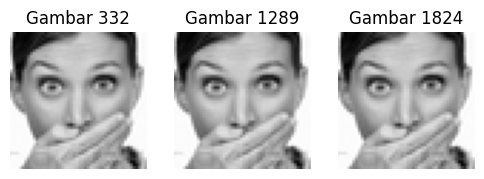

In [ ]:
# Indeks gambar yang akan ditampilkan
indices = [332, 1289, 1824]  # Ganti dengan indeks yang sesuai

# Buat subplot dengan 1 baris dan 3 kolom
fig, axs = plt.subplots(1, 3, figsize=(6, 3))

for i, idx in enumerate(indices):
    # Ambil string piksel dari baris data yang sesuai
    pixels_string = data.iloc[idx][' pixels']
    # Konversi string piksel menjadi gambar
    image = string_to_image(pixels_string)
    # Tampilkan gambar pada subplot
    axs[i].imshow(image, cmap='gray')
    axs[i].axis('off')  # Matikan sumbu
    axs[i].set_title(f'Gambar {idx}')  # Tambahkan judul

plt.show()

In [ ]:
data_new = data.drop_duplicates(subset=' pixels')

In [ ]:
data_new.shape

(34034, 3)

In [ ]:
duplicate_count = data_new.duplicated(subset=' pixels').sum()

print(f"Number of duplicate rows': {duplicate_count}")

Number of duplicate rows': 0


### Cek yang bukan wajah

In [ ]:
!pip install facenet-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0

In [ ]:
from facenet_pytorch import MTCNN
import torch
from PIL import Image
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import cv2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=10,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device
)

In [ ]:
def pixels_to_image(pixels_str):
    pixels = np.fromstring(pixels_str, sep=' ').astype(np.uint8)
    img = pixels.reshape(48, 48)  # Assuming image size is 48x48
    return Image.fromarray(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

# Detect faces in dataset
def detect_faces(df):
    face_detected = []

    for i, row in df.iterrows():
        img = pixels_to_image(row[' pixels'])  # Convert pixels to image
        x_aligned, prob = mtcnn(img, return_prob=True)
        print(f'Image: {i+1}, Prob: {prob}')
        if x_aligned is not None:
            face_detected.append(1)  # Face detected
        else:
            face_detected.append(0)  # No face detected

    return face_detected

In [ ]:
data_new['face_detected'] = detect_faces(data_new)

Streaming output truncated to the last 5000 lines.
Image: 30419, Prob: None
Image: 30420, Prob: 0.9953644275665283
Image: 30421, Prob: 0.9513803720474243
Image: 30422, Prob: 0.9994587302207947
Image: 30423, Prob: 0.9997214674949646
Image: 30424, Prob: 0.9986559152603149
Image: 30427, Prob: 0.998293936252594
Image: 30429, Prob: 0.999962329864502
Image: 30430, Prob: 0.9494348168373108
Image: 30431, Prob: 0.9999995231628418
Image: 30432, Prob: 0.9692786931991577
Image: 30433, Prob: 0.9997144341468811
Image: 30434, Prob: 0.999692440032959
Image: 30435, Prob: 0.9999878406524658
Image: 30436, Prob: 0.9995157718658447
Image: 30437, Prob: 0.9993792772293091
Image: 30438, Prob: 0.9985219836235046
Image: 30439, Prob: 0.9976429343223572
Image: 30440, Prob: 0.9987480640411377
Image: 30441, Prob: 0.9930779337882996
Image: 30442, Prob: 0.9952672719955444
Image: 30443, Prob: 0.993598461151123
Image: 30444, Prob: 0.9997005462646484
Image: 30445, Prob: 0.9999368190765381
Image: 30446, Prob: 0.999877929

<ipython-input-38-3e2ceb67e4be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['face_detected'] = detect_faces(data_new)


In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34034 entries, 0 to 35885
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   emotion        34034 non-null  int64 
 1    Usage         34034 non-null  object
 2    pixels        34034 non-null  object
 3   face_detected  34034 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.3+ MB


In [ ]:
data_new[data_new['face_detected'] == 0]

,emotion,Usage,pixels,face_detected
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,0
18,6,Training,134 124 167 180 197 194 203 210 204 203 209 20...,0
26,5,Training,162 200 187 180 197 198 196 192 176 152 136 11...,0
34,3,Training,66 63 76 65 49 44 52 43 47 95 121 51 41 49 145...,0
49,2,Training,166 124 94 87 87 103 137 177 212 231 240 245 2...,0
...,...,...,...,...
35860,3,PrivateTest,27 42 62 91 112 118 122 123 119 124 129 131 13...,0
35879,2,PrivateTest,0 0 6 16 19 31 47 18 26 19 17 8 15 3 4 2 14 20...,0
35880,2,PrivateTest,164 172 175 171 172 173 178 181 188 192 197 20...,0
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...,0


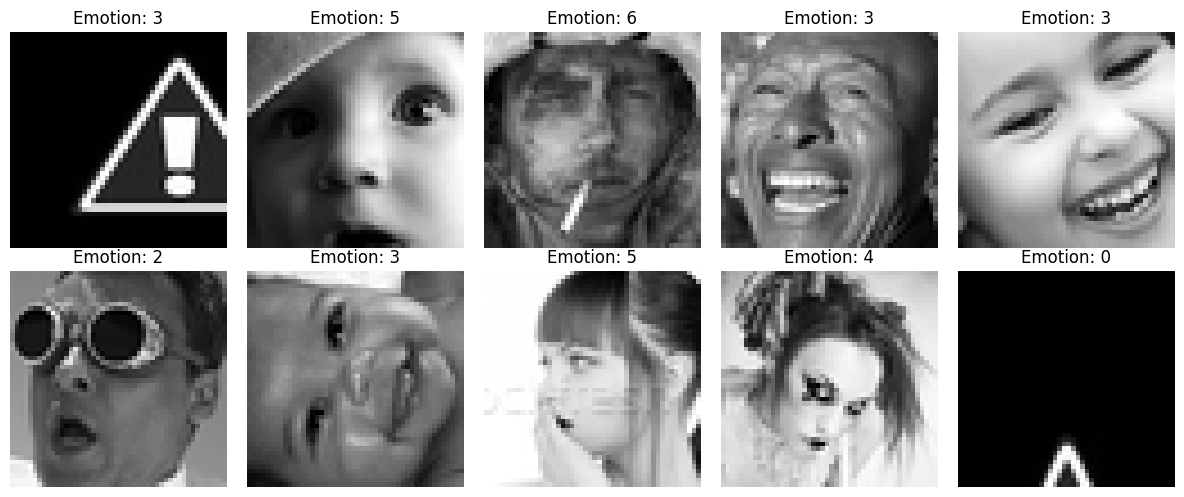

In [ ]:
# Pilih 10 sampel acak dari dataset
random_samples = data_new[data_new['face_detected'] == 0].sample(10)

# Atur grid untuk menampilkan 10 gambar (2 baris, 5 kolom)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

# Loop melalui 10 sampel acak dan tampilkan gambar
for i, (index, row) in enumerate(random_samples.iterrows()):
    # Konversi string menjadi gambar
    image = string_to_image(row[' pixels'])

    # Tentukan lokasi subplot
    ax = axes[i // 5, i % 5]

    # Tampilkan gambar
    ax.imshow(image, cmap='gray')
    ax.axis('off')  # Matikan axis pada setiap gambar

    # Tambahkan judul dengan label emotion
    ax.set_title(f"Emotion: {row['emotion']}")

# Sesuaikan spasi antar gambar
plt.tight_layout()
plt.show()

In [ ]:
data_final = data_new[data_new['face_detected'] == 1]

In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28350 entries, 0 to 35885
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   emotion        28350 non-null  int64 
 1    Usage         28350 non-null  object
 2    pixels        28350 non-null  object
 3   face_detected  28350 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


### lihat distribusi data

In [ ]:
emotion_labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
emotion_counts = data_final['emotion'].value_counts(sort=True).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_labels)
emotion_counts

,emotion,number
0,Happy,7585
1,Neutral,5377
2,Sad,4529
3,Angry,3975
4,Fear,3798
5,Surprise,2736
6,Disgust,350


<ipython-input-65-8dc94d7bf4f6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)


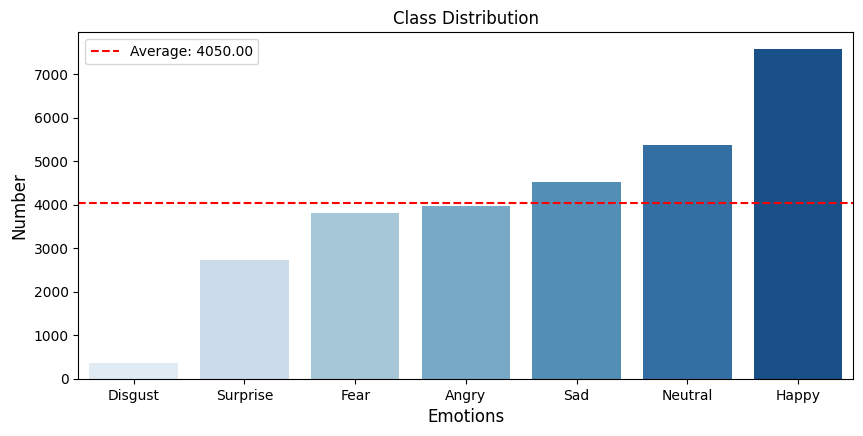

In [ ]:
emotion_counts_sorted = emotion_counts.sort_values(by='number', ascending=True)

# Calculate the average count
average_count = emotion_counts['number'].mean()

# Define colors and plot
colors = sns.color_palette("Blues", len(emotion_counts_sorted))

plt.figure(figsize=(10, 4.5))
sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)
plt.title('Class Distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)

# Add a horizontal line for the average
plt.axhline(average_count, color='red', linestyle='--', linewidth=1.5, label=f'Average: {average_count:.2f}')

# Add a legend to display the average line label
plt.legend()

plt.show()

In [ ]:
data_final.to_csv('/content/drive/MyDrive/Dataset/fer_clean.csv', index=False)

Note: untuk nanti pembagiannya 70:20:10